### Python code to estimate the Eff-score using ANN regression model


This notebook to present the results of the ANN regression with different combinations of inputs (i.e., 0,1,2,3) and ANN structure parameters (i.e., number of layers and number of neurons).

The inpout combinations and the ANN structure parameters can be modified

The route sections (All, North, Middle, South, direct) can be selected by modifying the value of the following flag switch (nth_mid_sth_fg) 

The inputs combination (0, 1, 2, 3) can be selected by modifying the value of the following flag switch (inp_idx) 

The ANN structure parameters are number of layer and eurons, while ANN training paramters are activation function, epochs. batch size, learning rate, data standardization.

This notebook is reproducible,  the user just needs to chang the user_name in first cell, then the rest will automatically be created, such as folders and subfolders where figure and excel files are saved.

In [1]:
user_name='mohabu'

In [2]:
import tensorflow as tf
tf.random.set_seed(42)
from numpy.random import seed
seed(0)

In [3]:
shuffle_sw=1 ## shuffle the data, this affecting the Eff-Score because it is fixed for all route
# shuffle_sw=0 ## Not shuffle the data

In [4]:
nth_mid_sth_fg=0 ## All sections
# nth_mid_sth_fg=1 ##North section
# nth_mid_sth_fg=2 ##Middle section
# nth_mid_sth_fg=3 ##South section
# nth_mid_sth_fg=4 ##Direct routes

In [5]:
# local_Eff_fg=1  ## use local data, where the eff-score calculated every timestep, 1min rather than the total route
local_Eff_fg=0

In [6]:
# gr_ock_fg=1  ## select Groto to Ockero routes only
# gr_ock_fg=0  ## select Ockero to Groto routes only
gr_ock_fg=2  ## ALl data together

In [7]:
#################
# var_inputs_combs=[0,1,2,3]
var_inputs_combs=[1]

In [8]:
Eff_limit_combs=[1] ## use all eff-score without upper or lower limits

In [9]:
out_eff_combs=[1]  ## Y=eff_score, 
# out_eff_combs=[0]  ## Y=EngineFuelRate, 

###################
act_fn_combs=['relu'] 
# act_fn_combs=['LeakyReLU'] 

#################
# lyr_combs = [1, 2, 3, 4, 5, 10]
lyr_combs = [5]

#################
# neo_combs = [10, 25, 50, 100]
neo_combs = [100]

#################
# optimizer_combs = ['Adam', 'SGD', 'RMSprop']
optimizer_combs = ['Adam']

#################
# epcs_combs = [50, 100]
epcs_combs = [100]

#################

### batch_size=round(0.05*X_train.shape[0])  ###fixed

#################
# learn_rt_combs=[0.01, 0.001]
learn_rt_combs=[0.01]

#################
# Stand_norm_combs=[0,1,2,3]
Stand_norm_combs=[1]

####################################

import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [10]:
##### folder name for saving files: figures, data, etc ####
Output_folder='Spatio_Temporl_Agg_Eff_Score'


Output_Subfolder = Output_folder+'/Indiv_Eff_Glob_Loc_ANN_RegMod_v1'+'/loc_'+str(local_Eff_fg)+'/NMS_'+str(nth_mid_sth_fg)+''+str(Eff_limit_combs[0])+'_GrOck_'+str(gr_ock_fg)
Shapley_Subfolder = Output_folder+'/Shapley_EFR_Eff'+'/loc_'+str(local_Eff_fg)+'/NMS_'+str(nth_mid_sth_fg)+'_EffTp_'+str(Eff_limit_combs[0])+'_GrOck_'+str(gr_ock_fg)



In [11]:
folder_path = r'C:/Users/'+user_name+'/'+Output_Subfolder
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    
folder_path = r'C:/Users/'+user_name+'/'+Shapley_Subfolder
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

In [12]:
import os
import pandas as pd
import numpy as np
import pickle
from datetime import timedelta

import netCDF4 as nc
import sys
import json
import plotly.express as px
import matplotlib.pyplot as plt


import shap
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import classification_report
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# from sklearn.externals import joblib
import joblib
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras import backend as k
import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import r2_score, mean_squared_error
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


import tensorflow as tf
tf.random.set_seed(42)
from numpy.random import seed
seed(0)


# ##########################################################################################################
# df_train1=pd.read_excel('C:/Users/'+user_name+'/OneDrive - Högskolan i Halmstad/Data_v3/Local_RTs_Weather/Gr_Ock_Weather_train.xlsx')
# df_test1=pd.read_excel('C:/Users/'+user_name+'/OneDrive - Högskolan i Halmstad/Data_v3/Local_RTs_Weather/Gr_Ock_Weather_test.xlsx')


# df_train2=pd.read_excel('C:/Users/'+user_name+'/OneDrive - Högskolan i Halmstad/Data_v3/Local_RTs_Weather/Ock_Gr_Weather_train.xlsx')
# df_test2=pd.read_excel('C:/Users/'+user_name+'/OneDrive - Högskolan i Halmstad/Data_v3/Local_RTs_Weather/Ock_Gr_Weather_test.xlsx')

# df_train2.RT_id=df_train2.RT_id+200
# df_test1.RT_id=df_test1.RT_id+200
# df_test2.RT_id=df_test2.RT_id+247

# df_train=pd.concat([df_train1, df_train2], axis=0)
# df_test=pd.concat([df_test1, df_test2], axis=0)

# df=pd.concat([df_train, df_test], axis=0)

 
# df.shape

##########################################################################################################
if local_Eff_fg==0:
    df=pd.read_excel('C:/Users/'+user_name+'/'+Output_folder+'/Agg_Eff_Data/All_directDatav3_incld_NewEff_F1_date_loc_0.xlsx')
if local_Eff_fg==1:
    df=pd.read_excel('C:/Users/'+user_name+'/'+Output_folder+'/Agg_Eff_Data/All_directDatav3_incld_NewEff_F1_date_loc_1.xlsx')




df.drop(columns='Unnamed: 0', inplace=True)

dforig=df
df.shape



(39193, 71)

In [13]:
df.RT_id.max()
len(df.RT_id.unique())

1754

In [14]:
df.columns

Index(['RT_id', 'time_xPorts', 'eff_score', 'latitude', 'longitude',
       'accelPedalPos', 'headingMagnetic', 'courseOverGroundTrue',
       'speedOverGround', 'pitch', 'roll', 'windSpeedOverGround',
       'windDirectionTrue', 'fuelPerStep', 'deltaDistance',
       'courseHeadingDiff', 'distanceFromDock', 'distanceToNextDock',
       'distanceToPreviousDock', 'accumDistLeg', 'accumFuelLeg',
       'accumTimeLeg', 'directionTrue', 'EngineFuelRate', 'speedApparent',
       'wind_course_diff', 'distance', 'fuel', 'time', 'time_norm',
       'distance_norm', 'fuel_norm', 'duration', 'fuel_total', 'time_total',
       'distance_total', 'engineFuelRate', 'windSpeed', 'windDirection',
       'waveheight', 'wavedirect', 'waveperiod', 'wavedrag_coeff',
       'speedOverGround_poly2', 'speedOverGround_poly3', 'fuel_Sp_formula',
       'speedOverGround_poly3_2', 'waveheight_poly3', 'windspeed_poly1_5',
       'meanwaveperiod', 'heading_wave', 'heading_wind', 'Cos_HWaveP',
       'Cos_HWindP', 

In [15]:
# st=stop

In [16]:
if gr_ock_fg==1:
    df=df[df.Gr_Ock_fg==1]
if gr_ock_fg==0:
    df=df[df.Gr_Ock_fg==0]
if gr_ock_fg==2:
    df=df
    
print(df.shape)
print(df.Gr_Ock_fg.unique())

(39193, 71)
[0 1]


In [17]:
df[(df.Direct_RT==1)].shape

(918, 71)

In [18]:
if nth_mid_sth_fg==0:
    df=df
if nth_mid_sth_fg==1:
    df_north=df[(df.Direct_RT==0) &
                ((df.latitude>57.71) & (df.longitude<11.679))]
    north_idx=df_north.index
    print(df_north.shape)
    df=df_north

if nth_mid_sth_fg==2:
    df_mid=df[(df.Direct_RT==0) &
              ((df.latitude>57.705) & (df.longitude>11.679) & (df.longitude<11.69))]
    mid_idx=df_mid.index
    print(df_mid.shape)
    df=df_mid
    
if nth_mid_sth_fg==3:
    df_south=df[(df.Direct_RT==0) &
                ((df.latitude<57.705) & (df.longitude>11.686))]
    south_idx=df_south.index
    print(df_south.shape)
    df=df_south
    
if nth_mid_sth_fg==4:
    df_direct=df[(df.Direct_RT==1)]
    direct_idx=df_direct.index
    print(df_direct.shape)
    df=df_direct
    
if nth_mid_sth_fg==13:
    df_NS=df[(df.Direct_RT==0) & 
              (((df.latitude>57.71) & (df.longitude<11.679)) | ((df.latitude<57.705) & (df.longitude>11.686)))]
    NS_idx=df_NS.index
    print(df_NS.shape)
    df=df_NS
    
if nth_mid_sth_fg==134:
    df_NS_direct=df[(df.Direct_RT==1) | ((df.latitude>57.71) & (df.longitude<11.679)) 
                    | ((df.latitude<57.705) & (df.longitude>11.686))]
    NS_direct_idx=df_NS_direct.index
    print(df_NS_direct.shape)
    df=df_NS_direct
    
if nth_mid_sth_fg==5:
    df=df[(df.Direct_RT==0)]

In [19]:
print(nth_mid_sth_fg)
df.shape

0


(39193, 71)

In [20]:
df1=df
df1.shape

(39193, 71)

In [21]:
df.columns

Index(['RT_id', 'time_xPorts', 'eff_score', 'latitude', 'longitude',
       'accelPedalPos', 'headingMagnetic', 'courseOverGroundTrue',
       'speedOverGround', 'pitch', 'roll', 'windSpeedOverGround',
       'windDirectionTrue', 'fuelPerStep', 'deltaDistance',
       'courseHeadingDiff', 'distanceFromDock', 'distanceToNextDock',
       'distanceToPreviousDock', 'accumDistLeg', 'accumFuelLeg',
       'accumTimeLeg', 'directionTrue', 'EngineFuelRate', 'speedApparent',
       'wind_course_diff', 'distance', 'fuel', 'time', 'time_norm',
       'distance_norm', 'fuel_norm', 'duration', 'fuel_total', 'time_total',
       'distance_total', 'engineFuelRate', 'windSpeed', 'windDirection',
       'waveheight', 'wavedirect', 'waveperiod', 'wavedrag_coeff',
       'speedOverGround_poly2', 'speedOverGround_poly3', 'fuel_Sp_formula',
       'speedOverGround_poly3_2', 'waveheight_poly3', 'windspeed_poly1_5',
       'meanwaveperiod', 'heading_wave', 'heading_wind', 'Cos_HWaveP',
       'Cos_HWindP', 

In [22]:
df1_eff_sort=pd.DataFrame([])
df1_eff_sort1=df1.sort_values(by=['eff_score'], ascending=[False])
rt_id=df1_eff_sort1.RT_id.unique().tolist()
for id in rt_id:
    df1_eff_sort=df1_eff_sort.append(df1_eff_sort1[(df1_eff_sort1.RT_id==id)].sort_values(by=['time_xPorts'], ascending=[True]))
    
df1_eff_sort.shape

(39193, 71)

In [23]:
print(df.RT_id.max())
print(len(df.RT_id.unique()))
print(len(df1.eff_score.unique()))

1753
1754
1740


In [24]:
# st=stop

In [25]:
cols1=['speedOverGround', 'pitch', 'roll', 'latitude', 'longitude','headingMagnetic', 'courseOverGroundTrue',
        'windSpeed_onboard', 'windDirection_onboard','speedApparent', 'wind_course_diff', 'windSpeed_cds','windDirection_cds',
       'windSpeed_sg', 'windDirection_sg','waveheight','wavedirect', 'currentSpeed', 'currentDirection']


### Shapley for EngineFuelRate

In [26]:
df1.shape

(39193, 71)

In [27]:
# df1['eff_score'][cruis_index].shape

In [28]:
# df1.loc[cruis_index].shape

In [29]:
Y = df1['EngineFuelRate']
### Y=df1['eff_score']

X = df1[cols1]

train_X, val_X, train_Y, val_Y = train_test_split(X, Y, random_state = 1)

train_X.shape

(29394, 19)

In [30]:
xgbr = XGBRegressor()
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
val_X_scaled = scaler.fit_transform(val_X)
val_X_mean = scaler.mean_
val_X_std = scaler.var_**(1/2)

In [31]:
xgbr_model = xgbr.fit(train_X_scaled, train_Y)

In [32]:
est = xgbr_model.predict(val_X_scaled)

In [33]:
r2_xgb=r2_score(val_Y, est)
r2_xgb

0.8497221170374174

In [34]:
xgbr_model.predict([train_X_scaled[1]])

array([21.901134], dtype=float32)

In [35]:
explainer = shap.TreeExplainer(xgbr_model, val_X_scaled)
shap_values = explainer.shap_values(val_X_scaled)

 98%|===================| 9584/9799 [00:23<00:00]        

In [36]:
shap_values.shape

(9799, 19)

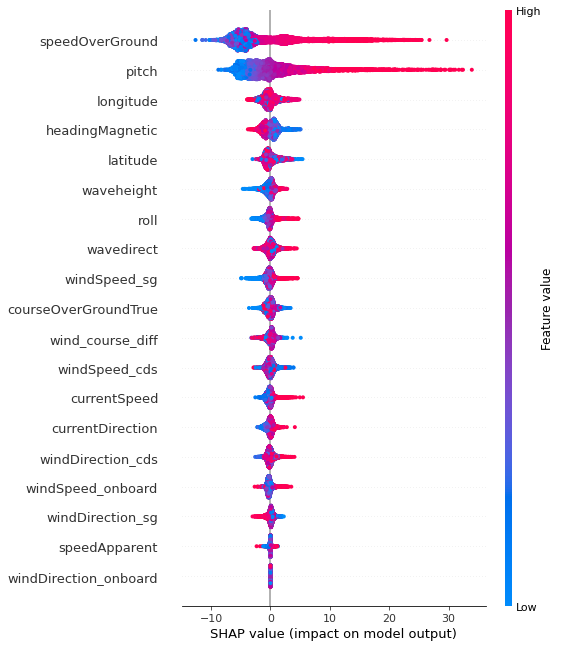

In [37]:
import matplotlib.pyplot as plt

val_X.columns=cols1

sym2=round(r2_xgb,4)
fig = plt.figure(figsize=(18,14))

shap.summary_plot(shap_values, val_X)

fig.savefig('C:/Users/'+user_name+'/'+Shapley_Subfolder+'/Shap_XGB_EngFuelRate_Routes_Weathers.png', dpi=500)

plt.show()

### Shapley for eff_score

In [38]:
df1.shape

(39193, 71)

In [39]:
df1['eff_score'].shape

(39193,)

In [40]:
# Y = df1['EngineFuelRate']
Y=df1['eff_score']

X = df1[cols1]

train_X, val_X, train_Y, val_Y = train_test_split(X, Y, random_state = 1)

train_X.shape

(29394, 19)

In [41]:
xgbr = XGBRegressor()
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
val_X_scaled = scaler.fit_transform(val_X)
val_X_mean = scaler.mean_
val_X_std = scaler.var_**(1/2)

In [42]:
xgbr_model = xgbr.fit(train_X_scaled, train_Y)

In [43]:
est = xgbr_model.predict(val_X_scaled)

In [44]:
r2_xgb=r2_score(val_Y, est)
r2_xgb

0.8060778654504384

In [45]:
xgbr_model.predict([train_X_scaled[1]])

array([0.52536786], dtype=float32)

In [46]:
explainer = shap.TreeExplainer(xgbr_model, val_X_scaled)
shap_values = explainer.shap_values(val_X_scaled)

 98%|===================| 9578/9799 [00:22<00:00]        

In [47]:
shap_values.shape

(9799, 19)

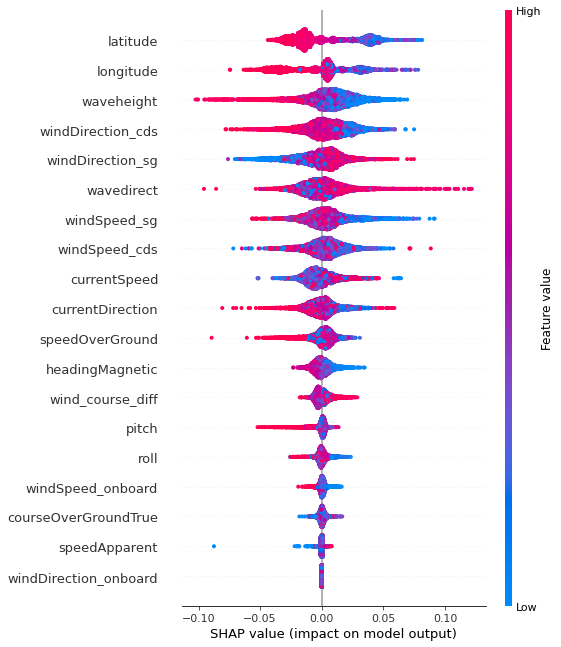

In [48]:
import matplotlib.pyplot as plt

val_X.columns=cols1

sym2=round(r2_xgb,4)
fig = plt.figure(figsize=(18,14))

shap.summary_plot(shap_values, val_X)

fig.savefig('C:/Users/'+user_name+'/'+Shapley_Subfolder+'/Shap_XGB_Eff_Score_Routes_Weathers.png', dpi=500)
plt.show()


In [49]:
# st=stop

In [50]:
def create_model(Numfeats, neurons, layers, act_fn, optimizer, learn_rt):
    model = Sequential()
    for i in range(lyr_no):
        if act_fn=='relu':
            model.add(Dense(neo, input_dim=Numfeats, activation='relu', kernel_initializer='normal'))
        if act_fn=='LeakyReLU':
            model.add(Dense(neo, input_dim=Numfeats, activation='LeakyReLU'))

    model.add(Dense(1, kernel_initializer='normal'))
    if optimizer=='Adam':
        model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=learn_rt), metrics=[r2_keras])
    if optimizer=='SGD':
        model.compile(loss=MeanSquaredError(), optimizer=SGD(learning_rate=learn_rt), metrics=[r2_keras])
    if optimizer=='RMSprop':
        model.compile(loss=MeanSquaredError(), optimizer=RMSprop(learning_rate=learn_rt), metrics=[r2_keras])
    return model

def metrics_eval(Y_act, Y_pred):
    mse_1 = mean_squared_error(Y_act, Y_pred, squared=True)
    rmse_1 = mean_squared_error(Y_act, Y_pred, squared=False)
    R2_1=r2_score(Y_act, Y_pred)
    mae=mean_absolute_error(Y_act, Y_pred,)
    rmse_n1=rmse_1/Y_act.max()
    rmse_n1

    print(' MSE: {:.6f}'.format(mse_1))
    print(' RMSE: {:.6f}'.format(rmse_1))
    print('Normalized RMSE: {:.6f}'.format(rmse_n1))
    print('R2: {:.6f}'.format(R2_1))
    print('MAE: {:.6f}'.format(mae))

    return mse_1, rmse_1, R2_1, mae, rmse_n1

# Define r2_keras as an accuracy metrics
def r2_keras(y_true, y_pred):

    ss_res = k.sum(k.square(y_true - y_pred))
    ss_tot = k.sum(k.square(y_true - k.mean(y_true)))
    return 1-ss_res/(ss_tot + k.epsilon())

# Define rmse as a loss function
def rmse(y_true, y_pred):

    return k.sqrt(k.mean(k.square(y_true - y_pred)))# Create the model

### Combinations of variety of options

In [51]:
Res_eff_avg=pd.DataFrame([])
dfst_iter=[];dfst_var_inputs=[];
dfst_inps=[];dfst_Stand_norm=[];dfst_inps_list=[];dfst_outs_list=[];
dfst_Lyrs=[];dfst_Neo=[];dfst_epcs=[];dfst_batch=[]; dfst_learn_rt=[];
dfst_gr_ok_dt_fg=[];dfst_Eff_limit_fg=[];dfst_lag_test=[];dfst_hrz=[];  
dfst_eff_meas_avg=[];dfst_eff_pred_avg=[];
dfst_MSE=[];dfst_RMSE=[]; dfst_R2=[];dfst_MAE=[];
dfst_act_fn=[]; dfst_optimizer=[];
dfst_best_score=[]; dfst_best_params=[]  

kk=0

kk= 0
 MSE: 0.000812
 RMSE: 0.028493
Normalized RMSE: 0.033874
R2: 0.898801
MAE: 0.020345


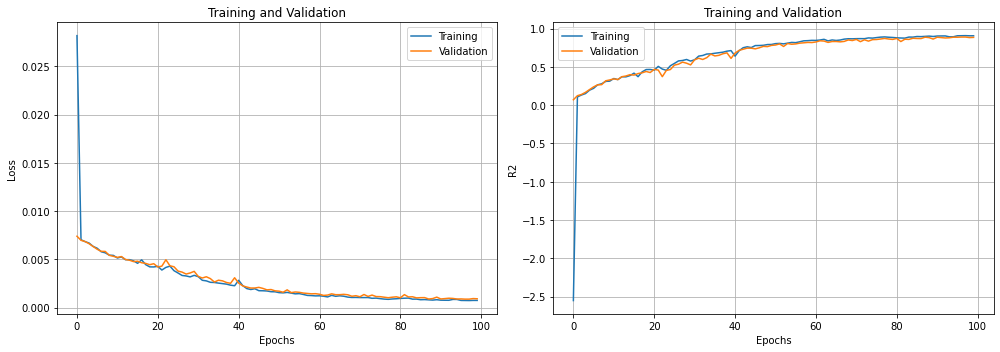

In [52]:
for out_eff in out_eff_combs:
    for var_inputs in var_inputs_combs:
        for Stand_norm in Stand_norm_combs:
            for lyr_no in lyr_combs:
                for neo in neo_combs:
                    for epcs in epcs_combs:
                        for learn_rt in learn_rt_combs:
                            for act_fn in act_fn_combs:
                                for optimizer in optimizer_combs:

                                    import tensorflow as tf
                                    tf.random.set_seed(42)
                                    from numpy.random import seed
                                    seed(0)

                                    ############################################################################################################################                        
                                    if out_eff==1:
                                        outputs=['eff_score']

                                        if var_inputs==0:
                                            inputs=['latitude', 'longitude', 'windSpeed_onboard', 'windDirection_onboard', 
                                                    'speedOverGround','headingMagnetic', 'eff_score']        
                            
                                        if var_inputs==1:
                                            inputs=['latitude', 'longitude', 'waveheight', 'wavedirect',
                                                    'windSpeed_cds', 'windSpeed_sg','windDirection_cds', 'windDirection_sg',
                                                    'currentSpeed','currentDirection',
                                                    'speedOverGround', 'headingMagnetic', 'eff_score']
                        
                                        if var_inputs==2:
                                            inputs=['latitude', 'longitude', 'windSpeed_onboard','windDirection_onboard', 
                                                    'waveheight', 'wavedirect',
                                                    'currentSpeed','currentDirection',
                                                    'speedOverGround','headingMagnetic', 'eff_score']

                                        if var_inputs==3:
                                            inputs=['latitude', 'longitude', 'windSpeed_onboard', 'windDirection_onboard',
                                                    'windSpeed_cds', 'windSpeed_sg','windDirection_cds', 'windDirection_sg',
                                                    'waveheight','wavedirect',
                                                    'currentSpeed','currentDirection',
                                                    'speedOverGround','headingMagnetic', 'eff_score']
                                            
                                    if out_eff==0:
                                        outputs=['EngineFuelRate']
                                        
                                        if var_inputs==0:
                                            inputs=['latitude', 'longitude', 'windSpeed_onboard', 'windDirection_onboard', 
                                                    'speedOverGround','headingMagnetic', 'EngineFuelRate']        
                            
                                        if var_inputs==1:
                                            inputs=['latitude', 'longitude', 'waveheight', 'wavedirect',
                                                    'windSpeed_cds', 'windSpeed_sg','windDirection_cds', 'windDirection_sg',
                                                    'currentSpeed','currentDirection',
                                                    'speedOverGround', 'headingMagnetic', 'EngineFuelRate']
                        
                                        if var_inputs==2:
                                            inputs=['latitude', 'longitude', 'windSpeed_onboard','windDirection_onboard', 
                                                    'waveheight', 'wavedirect',
                                                    'currentSpeed','currentDirection',
                                                    'speedOverGround','headingMagnetic', 'EngineFuelRate']

                                        if var_inputs==3:
                                            inputs=['latitude', 'longitude', 'windSpeed_onboard', 'windDirection_onboard',
                                                    'windSpeed_cds', 'windSpeed_sg','windDirection_cds', 'windDirection_sg',
                                                    'waveheight','wavedirect',
                                                    'currentSpeed','currentDirection',
                                                    'speedOverGround','headingMagnetic', 'EngineFuelRate']
                                            
                                    file_nm_ext='_loc_'+str(local_Eff_fg)+'_NMS_'+str(nth_mid_sth_fg)+'_EffTp_'+str(Eff_limit_combs[0])+'_GrOck_'+str(gr_ock_fg)+str(var_inputs)+'_outs_'+str(outputs[0])+'_lyrs_'+str(lyr_no)+'_Neo_'+str(neo)+'_epc_'+str(epcs)

                                    ############################################################################################################################                        
                                    #Import Libraries
                                    from keras.models import Sequential 
                                    from keras.layers import Dense 
                                    from sklearn.model_selection import GridSearchCV
                                    from keras.wrappers.scikit_learn import KerasRegressor
                                    from keras.layers import LSTM, LeakyReLU
                                    from sklearn.preprocessing import StandardScaler
                                    from tensorflow.keras.models import Sequential
                                    from tensorflow.keras.layers import *
                                    from tensorflow.keras.callbacks import ModelCheckpoint
                                    from tensorflow.keras.losses import MeanSquaredError
                                    from tensorflow.keras.metrics import RootMeanSquaredError
                                    from tensorflow.keras.optimizers import Adam, SGD, RMSprop



                                    ##Create the grid search
                                    dataset = df1[inputs]

                                    x = dataset.iloc[:, :-1].values
                                    y = dataset.iloc[:, -1].values
                                    Numfeats=x.shape[1]

                                    scaler = StandardScaler()
                                    X = scaler.fit_transform(x)
                                    
                                    if shuffle_sw==1:
                                        X_train, X_vlid, Y_train, Y_vlid = train_test_split(X, y, test_size=0.2,train_size=0.8, shuffle = True)
                                        X_valid, X_test, Y_valid, Y_test = train_test_split(X_vlid,Y_vlid, test_size = 0.25,train_size =0.75, shuffle = True)
                                        
                                    if shuffle_sw==0:
                                        X_train, X_vlid, Y_train, Y_vlid = train_test_split(X, y, test_size=0.2,train_size=0.8, shuffle = False)
                                        X_valid, X_test, Y_valid, Y_test = train_test_split(X_vlid,Y_vlid, test_size = 0.25,train_size =0.75, shuffle = False)

                                    batch_size=round(0.05*X_train.shape[0])  ###fixed batch size base on size of Training dataset
                                    
                                    model = create_model(Numfeats, neo, lyr_no, act_fn, optimizer, learn_rt)
                                    history = model.fit(X_train, Y_train, batch_size, validation_data=(X_valid, Y_valid), epochs=epcs,  verbose=0)

                                    #################### prediction  ########################
                                    y_pred = model.predict(X_test)

                                    Y_act=Y_test
                                    Y_pred=y_pred
                                    #########################################################

                                    ## Metrics for the predictions for all sequences
                                    print('kk=', kk)
                                    mse, rmse, R2, mae, rmse_n=metrics_eval(Y_act, Y_pred)

                                    dfst_iter.append(kk)
                                    dfst_var_inputs.append(var_inputs)
                                    dfst_inps.append(Numfeats)
                                    dfst_Stand_norm.append(Stand_norm)
                                    dfst_inps_list.append(inputs)
                                    dfst_outs_list.append(outputs)

                                    dfst_Lyrs.append(lyr_no)
                                    dfst_Neo.append(neo)
                                    dfst_epcs.append(epcs)
                                    dfst_batch.append(batch_size)
                                    dfst_learn_rt.append(learn_rt)
                                    dfst_act_fn.append(act_fn)
                                    dfst_optimizer.append(optimizer)


                                    dfst_MSE.append(round(mse,4))
                                    dfst_RMSE.append(round(rmse,4))
                                    dfst_R2.append(round(R2,4))
                                    dfst_MAE.append(round(mae,4))



                                    Res_eff_avg=pd.DataFrame({'outputs':dfst_outs_list,'inputs':dfst_inps_list, 
                                                              'Inputs_index': dfst_var_inputs, 'No_inputs':dfst_inps,
                                                              'No#_layers':dfst_Lyrs,'No# neurons':dfst_Neo, 
                                                              'epochs':dfst_epcs,'batch':dfst_batch, 'Learn Rate':dfst_learn_rt,
                                                              'act_fn': dfst_act_fn, 'optimizer': dfst_optimizer,                         
                                                              'MSE':dfst_MSE, 'RMSE':dfst_RMSE, 'R2':dfst_R2, 'MAE':dfst_MAE})

                                    kk=kk+1
                                    if kk==1:
                                        import random
                                        sym=round(random.uniform(0, 1),4)    
                                    Res_eff_avg.to_excel('C:/Users/'+user_name+'/'+Output_Subfolder+'/Search_Eff_Reg_Mod_All_weathers_loc_'+str(local_Eff_fg)+'_NMS_'+str(nth_mid_sth_fg)+'_EffTp_'+str(Eff_limit_combs[0])+'_GrOck_'+str(gr_ock_fg)+'_'+str(sym)+'.xlsx')

                                    ##################################   
                                    if (R2>0.5) | (kk%40 == 0):
                                        
                                        r2_sym=round(R2,4) 
                                        #### Plot Train and Valid
                                        fig = plt.figure(figsize=(14,5))
                                        plt.subplot(1,2, 1)
                                        plt.plot(history.history['loss'], label='Training')
                                        plt.plot(history.history['val_loss'], label='Validation')
                                        plt.title('Training and Validation')
                                        plt.xlabel('Epochs')
                                        plt.ylabel('Loss')
                                        plt.legend()
                                        plt.grid()


                                        plt.subplot(1,2, 2)
                                        plt.plot(history.history['r2_keras'], label='Training')
                                        plt.plot(history.history['val_r2_keras'], label='Validation')
                                        plt.title('Training and Validation')
                                        plt.xlabel('Epochs')
                                        plt.ylabel('R2')
                                        plt.legend()
                                        plt.grid()

                                        plt.tight_layout()
#                                         plt.savefig('C:/Users/'+user_name+'/'+Output_Subfolder+'/TrainValid_Plot_Eff_FL_ANN_Reg'+file_nm_ext+'_R2_'+str(r2_sym)+'_'+'.png', dpi=300)

                                        plt.show()
                                        plt.close()

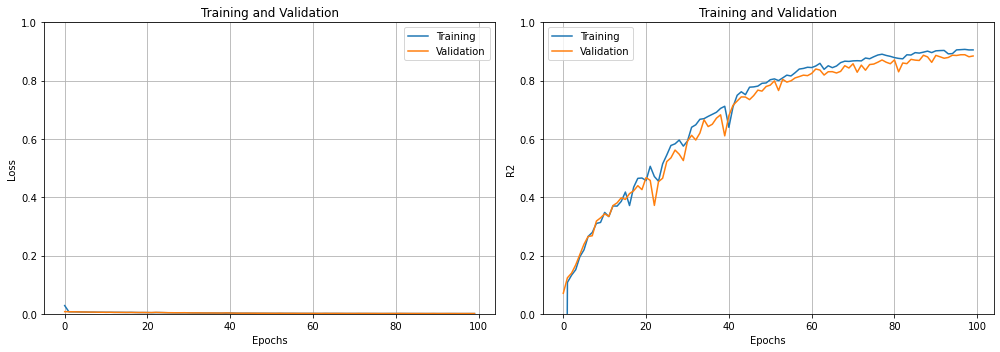

In [53]:
fig = plt.figure(figsize=(14,5))
plt.subplot(1,2, 1)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Training and Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 1)
plt.legend()
plt.grid()


plt.subplot(1,2, 2)
plt.plot(history.history['r2_keras'], label='Training')
plt.plot(history.history['val_r2_keras'], label='Validation')
plt.title('Training and Validation')
plt.xlabel('Epochs')
plt.ylabel('R2')
plt.ylim(0, 1)
plt.legend()
plt.grid()

plt.tight_layout()
plt.savefig('C:/Users/'+user_name+'/'+Output_Subfolder+'/TrainValid_Plot_Eff_FL_ANN_Reg'+file_nm_ext+str(r2_sym)+'_'+'.png', dpi=300)

plt.show()
# plt.close()

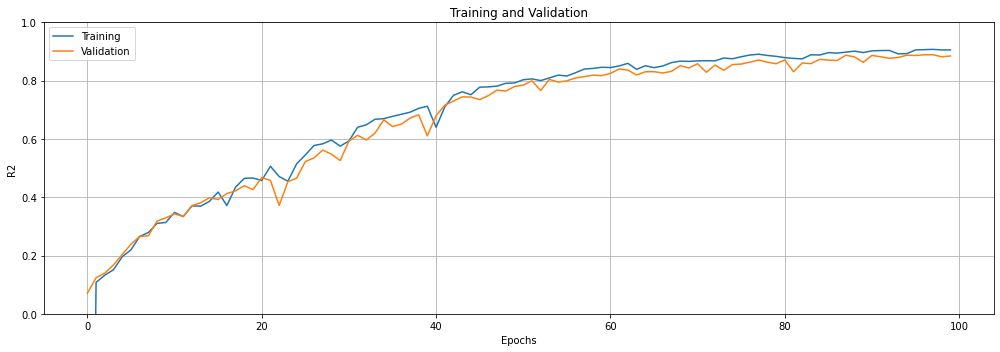

In [54]:
fig = plt.figure(figsize=(14,5))
plt.plot(history.history['r2_keras'], label='Training')
plt.plot(history.history['val_r2_keras'], label='Validation')
plt.title('Training and Validation')
plt.xlabel('Epochs')
plt.ylabel('R2')
plt.ylim(0, 1)
plt.legend()
plt.grid()

plt.tight_layout()
# plt.savefig('C:/Users/'+user_name+'/'+Output_Subfolder+'/TrainValid_R2_Plot_Eff_FL_ANN_Reg'+file_nm_ext+str(r2_sym)+'_'+'.png', dpi=400)

plt.show()
# plt.close()

In [55]:
# print(X_train.shape); print(X_valid.shape); print(X_test.shape)
# print(Y_train.shape); print(Y_valid.shape); print(Y_test.shape)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1300      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 41,801
Trainable params: 41,801
Non-traina

In [56]:
from IPython.display import Javascript
from nbconvert import HTMLExporter

def save_notebook():
    display(
        Javascript("IPython.notebook.save_notebook()"),
        include=['application/javascript']
    )

def output_HTML(read_file, output_file):
    import codecs
    import nbformat
    exporter = HTMLExporter()
    # read_file is '.ipynb', output_file is '.html'
    output_notebook = nbformat.read(read_file, as_version=4)
    output, resources = exporter.from_notebook_node(output_notebook)
    codecs.open(output_file, 'w', encoding='utf-8').write(output)

cwd = os.getcwd() 
directory = os.path.join('C:/Users/'+user_name+'/iHelm/Spatio_Temporl_Agg_Eff_Score')
os.chdir(directory) 
####################
import random
sym=round(random.uniform(0, 1),4)  

import time

save_notebook()
time.sleep(3)
current_file = 'Indiv_Eff_Glob_Loc_ANN_RegMod_v1.ipynb'
output_file = 'C:/Users/'+user_name+'/'+Output_Subfolder+'/Indiv_Eff_Glob_Loc_ANN_RegMod_v1_'+str(sym)+'.html'

output_HTML(current_file, output_file)
